In [1]:
import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

import seaborn

In [2]:
dataset = pd.read_csv('Mall_Customers.csv')


In [3]:
dataset

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [4]:
dataset.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [5]:
dataset.rename(columns={'Annual Income (k$)':'Income','Spending Score (1-100)':'Score'},inplace=True)

In [6]:
dataset

,CustomerID,Genre,Age,Income,Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


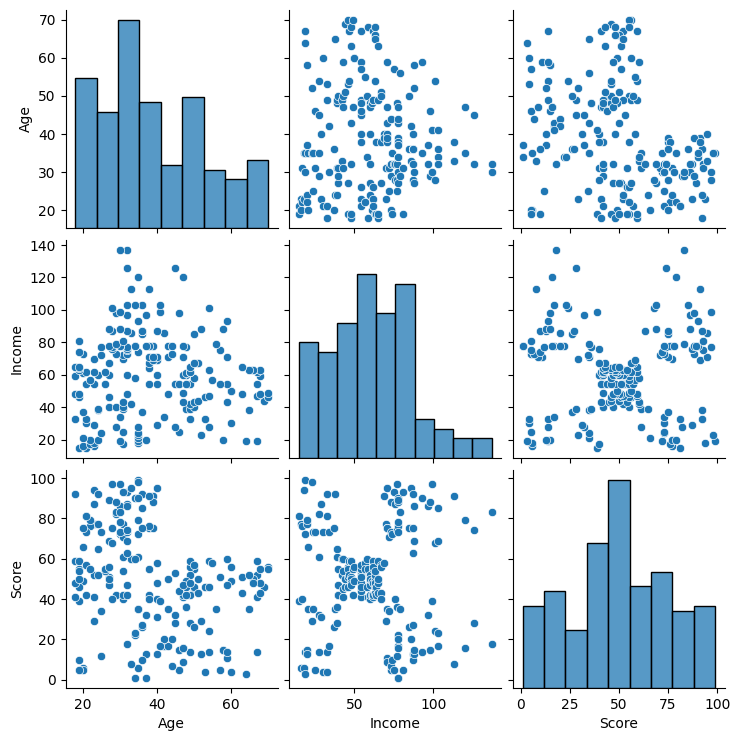

In [7]:
seaborn.pairplot(dataset[['Age','Income','Score']])

In [8]:
import sklearn.cluster as cluster

kmeans= cluster.KMeans(n_clusters=5)

kmeans = kmeans.fit(dataset[['Score','Income']])

kmeans.cluster_centers_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([[20.91304348, 26.30434783],
       [49.51851852, 55.2962963 ],
       [17.11428571, 88.2       ],
       [82.12820513, 86.53846154],
       [79.36363636, 25.72727273]])

In [9]:
dataset['Income_Cluster'] = kmeans.labels_

dataset

,CustomerID,Genre,Age,Income,Score,Income_Cluster
0,1,Male,19,15,39,0
1,2,Male,21,15,81,4
2,3,Female,20,16,6,0
3,4,Female,23,16,77,4
4,5,Female,31,17,40,0
...,...,...,...,...,...,...
195,196,Female,35,120,79,3
196,197,Female,45,126,28,2
197,198,Male,32,126,74,3
198,199,Male,32,137,18,2


In [10]:
dataset['Income_Cluster'].value_counts()

1    81
3    39
2    35
0    23
4    22
Name: Income_Cluster, dtype: int64

<Axes: xlabel='Income', ylabel='Score'>

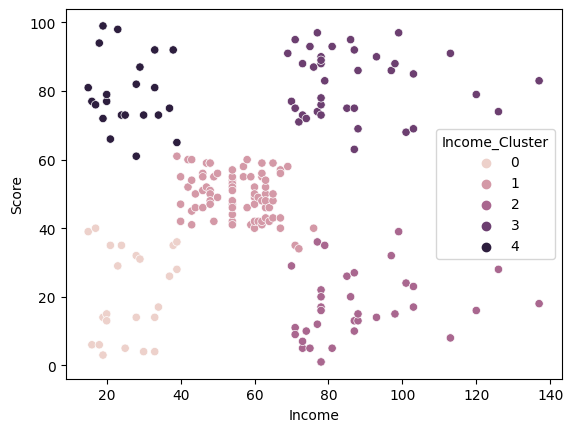

In [11]:
seaborn.scatterplot(x='Income',y='Score',hue='Income_Cluster',data=dataset)


In [12]:
kmeans= cluster.KMeans(n_clusters=2)

kmeans = kmeans.fit(dataset[['Age','Score']])

kmeans.cluster_centers_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([[46.16521739, 32.88695652],
       [28.95294118, 73.62352941]])

In [13]:
dataset['Age_Cluster'] = kmeans.labels_

dataset

,CustomerID,Genre,Age,Income,Score,Income_Cluster,Age_Cluster
0,1,Male,19,15,39,0,0
1,2,Male,21,15,81,4,1
2,3,Female,20,16,6,0,0
3,4,Female,23,16,77,4,1
4,5,Female,31,17,40,0,0
...,...,...,...,...,...,...,...
195,196,Female,35,120,79,3,1
196,197,Female,45,126,28,2,0
197,198,Male,32,126,74,3,1
198,199,Male,32,137,18,2,0


In [17]:
dataset['Age_Cluster'].value_counts()

0    115
1     85
Name: Age_Cluster, dtype: int64

<Axes: xlabel='Age', ylabel='Score'>

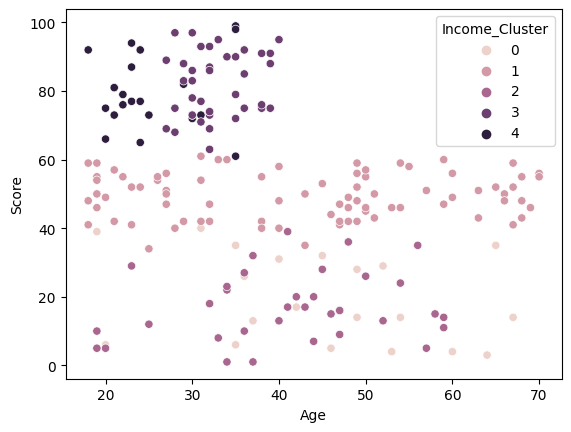

In [19]:
seaborn.scatterplot(x='Age',y='Score',hue='Income_Cluster',data=dataset)